In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
application_data = pd.read_csv("loan_approval_data.csv")
application_data.info()
application_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


In [3]:
categorical_col = application_data.select_dtypes(include=["object"]).columns
numerical_col = application_data.select_dtypes(include=["float64"]).columns

In [4]:
from sklearn.impute import SimpleImputer
num_imp = SimpleImputer(strategy="mean")
application_data[numerical_col] = num_imp.fit_transform(application_data[numerical_col])

In [5]:
cat_imp = SimpleImputer(strategy="most_frequent")
application_data[categorical_col] = cat_imp.fit_transform(application_data[categorical_col])

In [6]:
application_data.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

In [7]:
class_count = application_data["Loan_Approved"].value_counts()

In [8]:
class_count

Loan_Approved
No     702
Yes    298
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2bd05b62ba0>,
 [Text(-0.6521425375337495, 0.8858386482531919, 'NO'),
  Text(0.6521428261765839, -0.8858384357581341, 'Yes')],
 [Text(-0.3557141113820451, 0.48318471722901374, '70.2%'),
  Text(0.3557142688235912, -0.4831846013226186, '29.8%')])

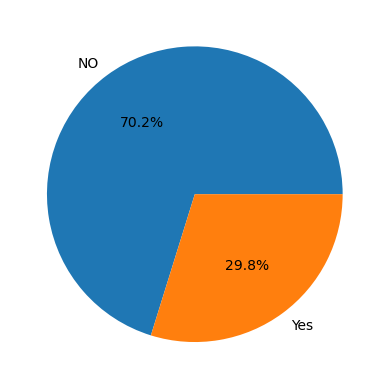

In [9]:
plt.pie(class_count,
       labels=["NO","Yes"],
       autopct="%1.1f%%")

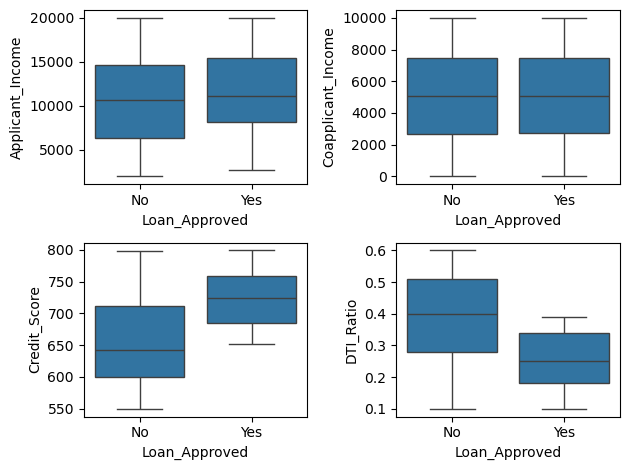

In [10]:
fig, axes = plt.subplots(2,2)

sns.boxplot(ax= axes[0,0],data=application_data,x="Loan_Approved",y="Applicant_Income")
sns.boxplot(ax= axes[0,1],data=application_data,x="Loan_Approved",y="Coapplicant_Income")
sns.boxplot(ax= axes[1,0],data=application_data,x="Loan_Approved",y="Credit_Score")
sns.boxplot(ax= axes[1,1],data=application_data,x="Loan_Approved",y="DTI_Ratio")

plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

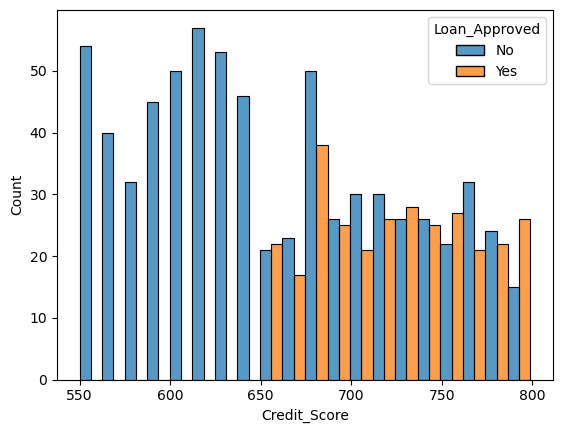

In [11]:
sns.histplot(
    data=application_data,
    x="Credit_Score",
    hue="Loan_Approved",
    bins=20,
    multiple="dodge"
)

In [12]:
application_data = application_data.drop("Applicant_ID", axis = 1)

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
application_data["Education_Level"] = le. fit_transform( application_data["Education_Level"])
application_data["Loan_Approved"] = le.fit_transform(application_data["Loan_Approved"])

In [14]:
col = ["Employer_Category","Gender","Loan_Purpose","Marital_Status","Employment_Status","Property_Area"]
ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
encoded = ohe.fit_transform(application_data[col])
cls = ohe.get_feature_names_out(col)
encoded_data = pd.DataFrame(encoded,columns=cls,index=application_data.index)
data =  pd.concat([application_data.drop(columns=col),encoded_data],axis=1)

In [15]:
data.head()
# data.describe()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Marital_Status_Single,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Property_Area_Semiurban,Property_Area_Urban
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [16]:
num_col = data.select_dtypes("number")
# num_col.corr()["Loan_Approved"].sort_values(ascending = False)
cor_matrix = num_col.corr()

<Axes: >

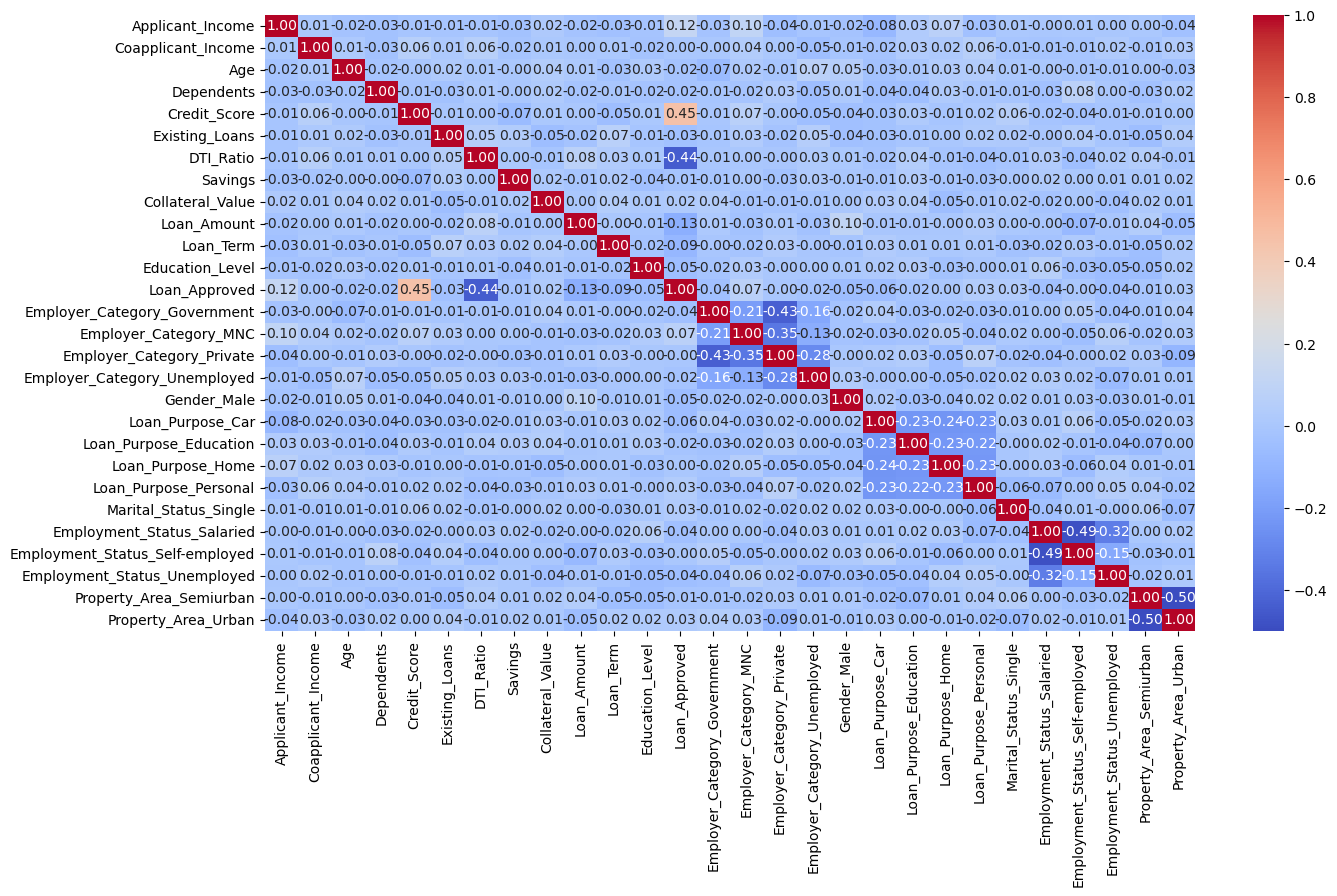

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(
    cor_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

In [18]:
x = data.drop("Loan_Approved", axis = 1)
y = data["Loan_Approved"]

xtr, xts,ytr, yts = train_test_split(x,y,test_size=0.2,random_state = 42)

In [19]:
data.dtypes

Applicant_Income                   float64
Coapplicant_Income                 float64
Age                                float64
Dependents                         float64
Credit_Score                       float64
Existing_Loans                     float64
DTI_Ratio                          float64
Savings                            float64
Collateral_Value                   float64
Loan_Amount                        float64
Loan_Term                          float64
Education_Level                      int64
Loan_Approved                        int64
Employer_Category_Government       float64
Employer_Category_MNC              float64
Employer_Category_Private          float64
Employer_Category_Unemployed       float64
Gender_Male                        float64
Loan_Purpose_Car                   float64
Loan_Purpose_Education             float64
Loan_Purpose_Home                  float64
Loan_Purpose_Personal              float64
Marital_Status_Single              float64
Employment_

In [20]:
scaler = StandardScaler()
xtr = scaler.fit_transform(xtr)
xts = scaler.transform(xts)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

logistic_model = LogisticRegression()
logistic_model.fit(xtr,ytr)
y_pred = logistic_model.predict(xts)

print("Confusion matrix", confusion_matrix(yts,y_pred))
print("precsion score", precision_score(yts,y_pred))
print("Recall score", recall_score(yts,y_pred))
print("F1 score", f1_score(yts,y_pred))
print("Accuracy score", accuracy_score(yts,y_pred))

Confusion matrix [[126  13]
 [ 14  47]]
precsion score 0.7833333333333333
Recall score 0.7704918032786885
F1 score 0.7768595041322314
Accuracy score 0.865


In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(xtr,ytr)
y_pred = knn_model.predict(xts)

print("Confusion matrix", confusion_matrix(yts,y_pred))
print("precsion score", precision_score(yts,y_pred))
print("Recall score", recall_score(yts,y_pred))
print("F1 score", f1_score(yts,y_pred))
print("Accuracy score", accuracy_score(yts,y_pred))

Confusion matrix [[120  19]
 [ 29  32]]
precsion score 0.6274509803921569
Recall score 0.5245901639344263
F1 score 0.5714285714285714
Accuracy score 0.76


In [32]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(xtr,ytr)
y_pred = nb_model.predict(xts)

print("Confusion matrix", confusion_matrix(yts,y_pred))
print("precsion score", precision_score(yts,y_pred))
print("Recall score", recall_score(yts,y_pred))
print("F1 score", f1_score(yts,y_pred))
print("Accuracy score", accuracy_score(yts,y_pred))

Confusion matrix [[128  11]
 [ 16  45]]
precsion score 0.8035714285714286
Recall score 0.7377049180327869
F1 score 0.7692307692307693
Accuracy score 0.865
